<a href="https://colab.research.google.com/github/EliasOrphelin/Analysis/blob/main/multi_indicateurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

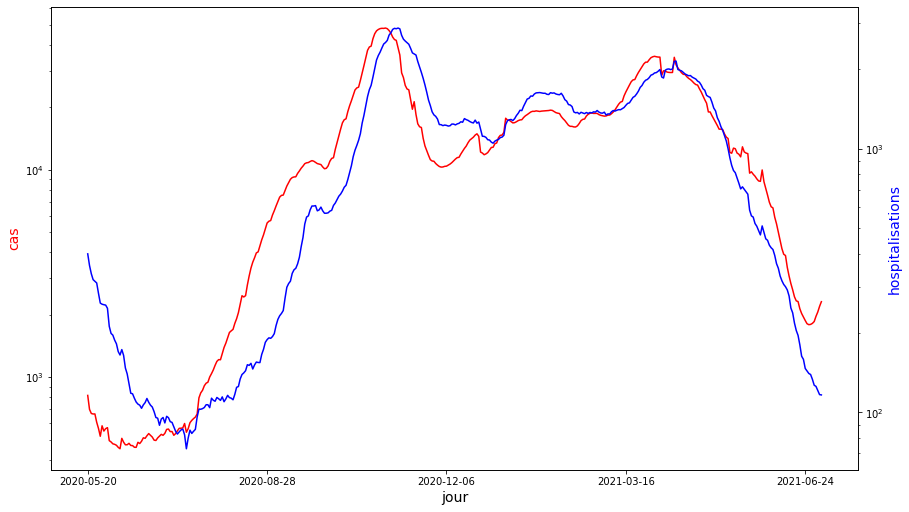

In [1]:
#data et bibliothèques
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
source1= ("https://www.data.gouv.fr/fr/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c")
source2= ("https://www.data.gouv.fr/fr/datasets/r/dd0de5d9-b5a5-4503-930a-7b08dc0adc7c")

#data frames
df_hospis = pd.read_csv(source1,sep=";")
df_cas = pd.read_csv(source2,sep=";")

#nettoyage des cas
is_total =  df_cas['cl_age90']==0
df_cas=df_cas[is_total]
df_cas=df_cas.drop(columns=['fra','P_f','P_h','T_f','T_h','T','cl_age90','pop'])

#nettoyage des hospis
df_hospis=df_hospis.groupby(['jour']).sum()

#join et clean
df=pd.merge(df_hospis,df_cas,on='jour')
df['hospitalisations']=df['incid_hosp'].rolling(7).mean()
df['réanimations']=df['incid_rea'].rolling(7).mean()
df['décès']=df['incid_dc'].rolling(7).mean()
df['retours à domicile']=df['incid_rad'].rolling(7).mean()
df['cas']=df['P'].rolling(7).mean()
df=df.drop(columns=['incid_hosp','incid_rea','incid_dc','incid_rad','P'])
df=df.drop([0,1,2,3,4,5,6])

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax = plt.axes(yscale='log')
ax.plot(df['jour'], df['cas'], color="red")
# set x-axis label
ax.set_xlabel("jour",fontsize=14)
# set y-axis label
ax.set_ylabel("cas",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.set_yscale('log')

# make a plot with different y-axis using second axis object

ax2.plot(df['jour'],  df['hospitalisations'],color="blue")
ax2.set_ylabel("hospitalisations",color="blue",fontsize=14)

ax.xaxis.set_major_locator(MultipleLocator(100))

fig.tight_layout()
fig.set_size_inches(15,8)


plt.show()



#sns.pairplot(df)
#corr = df.corr()
#sns.heatmap(corr)
